In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing as p
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense


In [2]:
#utwórz zmienną EPOCHS i przypisz do niej wartość 10000 lub więcej
EPOCHS = 10001

In [4]:
#wczytaj dane heart
df = pd.read_csv('heart.csv')

#standaryzuj dane
data = np.asarray(df)
X = data[:, 0:13] #zmienna X zawiera wszystkie pomiary od kolumny 0 do 12
y = data[:,13] #zmienna y zawiera etykietę (output)

data_ss = p.StandardScaler().fit_transform(X)
data_ss

#podziel je na dane treningowe i walidacyjne
X_train, X_val, y_train, y_val = train_test_split(data_ss, y, test_size= 0.2)

In [5]:
from tensorflow.keras.callbacks import EarlyStopping
#ustawienie monitora wczesnego zatrzymania, monitorujemy wartość loss na zbiorze walidacyjnym
es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

In [7]:
#stwórz model o dwóch warstwach ukrytych (64 i 8). Nadaj modelowi i historii uczenia unikalną nazwę
#do polecenia fit dodaj jako argument callbacks = [es]
model_bambi = Sequential([
#       13 neuronów wejściowych
        Input(shape = (13)), 
        Dense(64, activation = 'relu'), 
        Dense(8, activation = 'relu'),
        Dense(1)
])

#podsumowanie budowy i wielkości modelu
model_bambi.summary()

#kompilowanie modelu
model_bambi.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#proces uczenia się już napisałam

history_bambi = model_bambi.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val), callbacks = [es])

#zamiana wyników zapisanych w history na dataframe
hist_bambi = pd.DataFrame(history_bambi.history)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1425 (5.57 KB)
Trainable params: 1425 (5.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10001
8/8 [==============================] - 1s 21ms/step - loss: 2.9164 - accuracy: 0.3760 - val_loss: 2.9500 - val_accuracy: 0.4918
Epoch 2/10001
8/8 [==============================] - 0s 4ms/step - loss: 1.9809 - accuracy: 0.5620 - val_loss: 1.9494 - val_accuracy: 0.5738
Epo

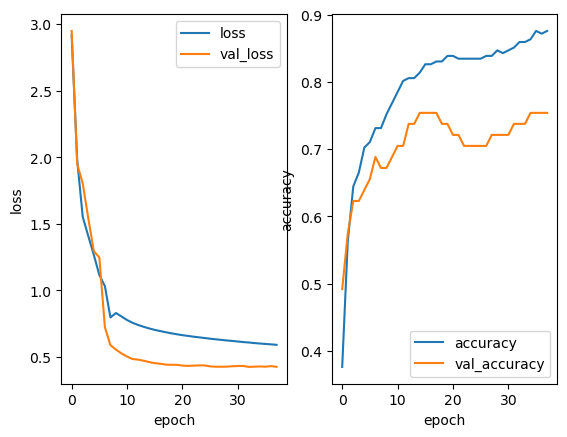

In [8]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy
plt.subplot(1, 2, 1)
#1 liczba - ile wierszy wykresów będzie
#2 liczba - ile kolumn wykresów będzie
#3 liczba - który wykres definiujemy
plt.plot(hist_bambi.loss, label = "loss")
plt.plot(hist_bambi.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_bambi.accuracy, label = "accuracy")
plt.plot(hist_bambi.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")


plt.legend()

In [ ]:
#stwórz model o dwóch warstwach ukrytych (4 i 2). Nadaj modelowi i historii uczenia unikalną nazwę
#do polecenia fit dodaj jako argument callbacks = [es]


In [ ]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy